In [1]:
import sys

class UnbufferedStream:
    def __init__(self, stream):
        self._stream = stream
    def write(self, data):
        self._stream.write(data)
        self._stream.flush()
    def writelines(self, lines):
        self._stream.writelines(lines)
        self._stream.flush()
    def __getattr__(self, name):
        return getattr(self._stream, name)

sys.stdout = UnbufferedStream(sys.stdout)
sys.stderr = UnbufferedStream(sys.stderr)

In [2]:
from testTools import primality_complexity, graph_complexity
from smooth import sieve_to, is_prime, factorize, is_smooth
import time
import json
import random
from collections import Counter
import numpy as np

In [3]:
t1 = time.time()
p = is_prime("999983")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("999999999989")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("9223372036854775783")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("170141183460469231731687303715884105727")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("115792089237316195423570985008687907853269984665640564039457584007913129639747")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783")
t2 = time.time()
print(t2-t1, p)

5.984306335449219e-05 True
0.00011396408081054688 True
0.00017404556274414062 True
0.06199193000793457 True
0.6307239532470703 True
4.014862298965454 True


In [4]:
with open("assets/large_prime_dataset.json", 'r') as f:
    raw = json.load(f)
data =  {int(k): v for k, v in raw.items()}

primes_64_bit = [(2**n - k) for n in range(8, 65) for k in data[n]]
primes_256_bit = [(2**n - k) for n in range(8, 257) for k in data[n]]
primes_400_bit = [(2**n - k) for n in range(8, 401) for k in data[n]]

print(len(primes_64_bit), max(primes_64_bit))
print(len(primes_256_bit), max(primes_256_bit))
print(len(primes_400_bit), max(primes_400_bit))

data_64 = primes_64_bit
data_256 = [primes_256_bit[i] for i in range(0, len(primes_256_bit), 4)]
data_400 = [primes_400_bit[i] for i in range(0, len(primes_400_bit), 5)]
print(len(data_64), len(data_256), len(data_400))

570 18446744073709551557
2490 115792089237316195423570985008687907853269984665640564039457584007913129639747
3930 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783
570 623 786


In [ ]:
times_64 = primality_complexity(lambda n : is_prime(n), 0, data_64)
times_256 = primality_complexity(lambda n : is_prime(n), 0, data_256)
times_400 = primality_complexity(lambda n : is_prime(n), 0, data_400)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
197 18446744073709551557 7.152557375267321e-07 5.292892456076892e-05


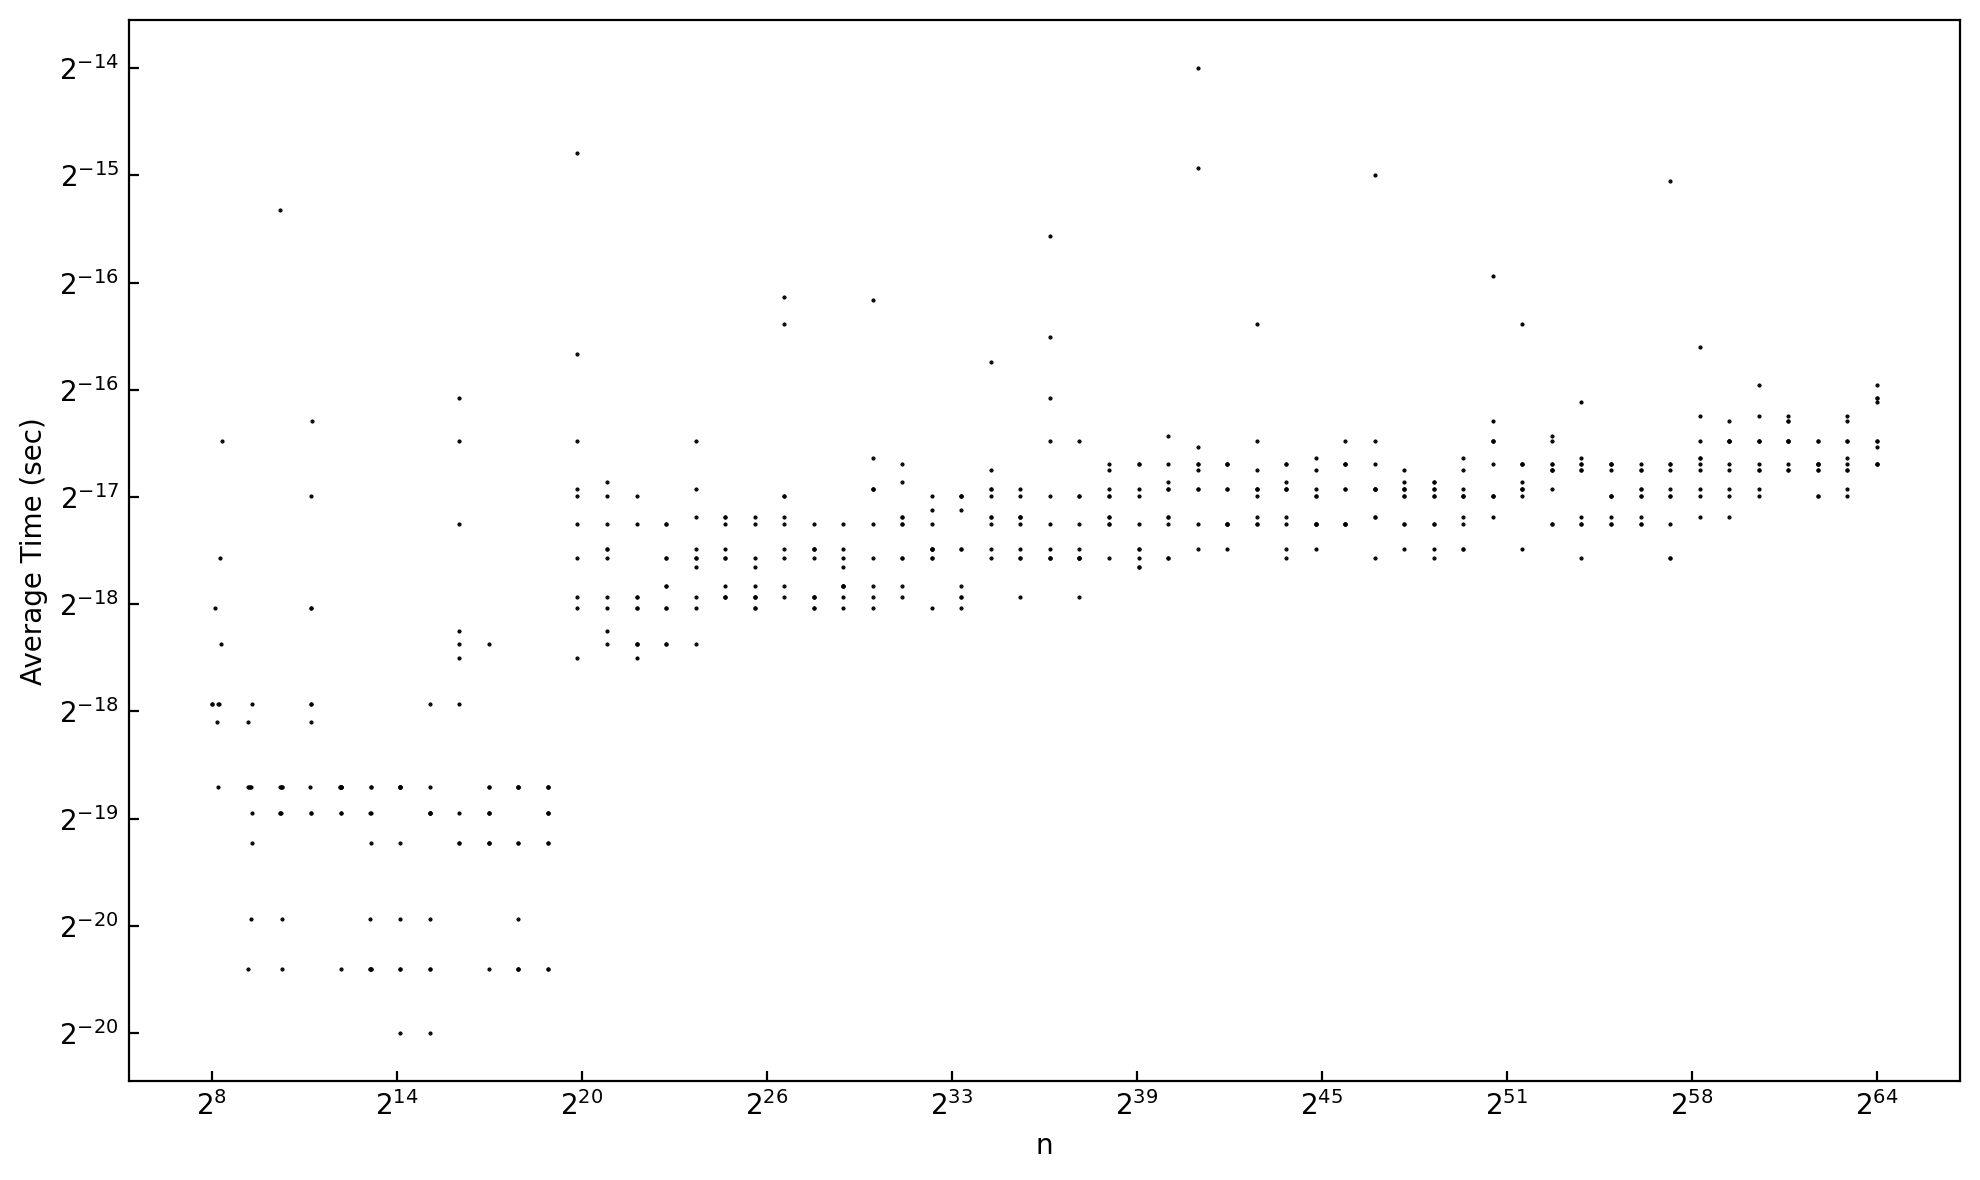

In [13]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_64[0]], times_64[1], dpts=560, log=True)

Finished concat.
Graphing...
199 115792089237316195423570985008687907853269984665640564039457584007913129639747 9.536743166282946e-07 1.0307641029357912


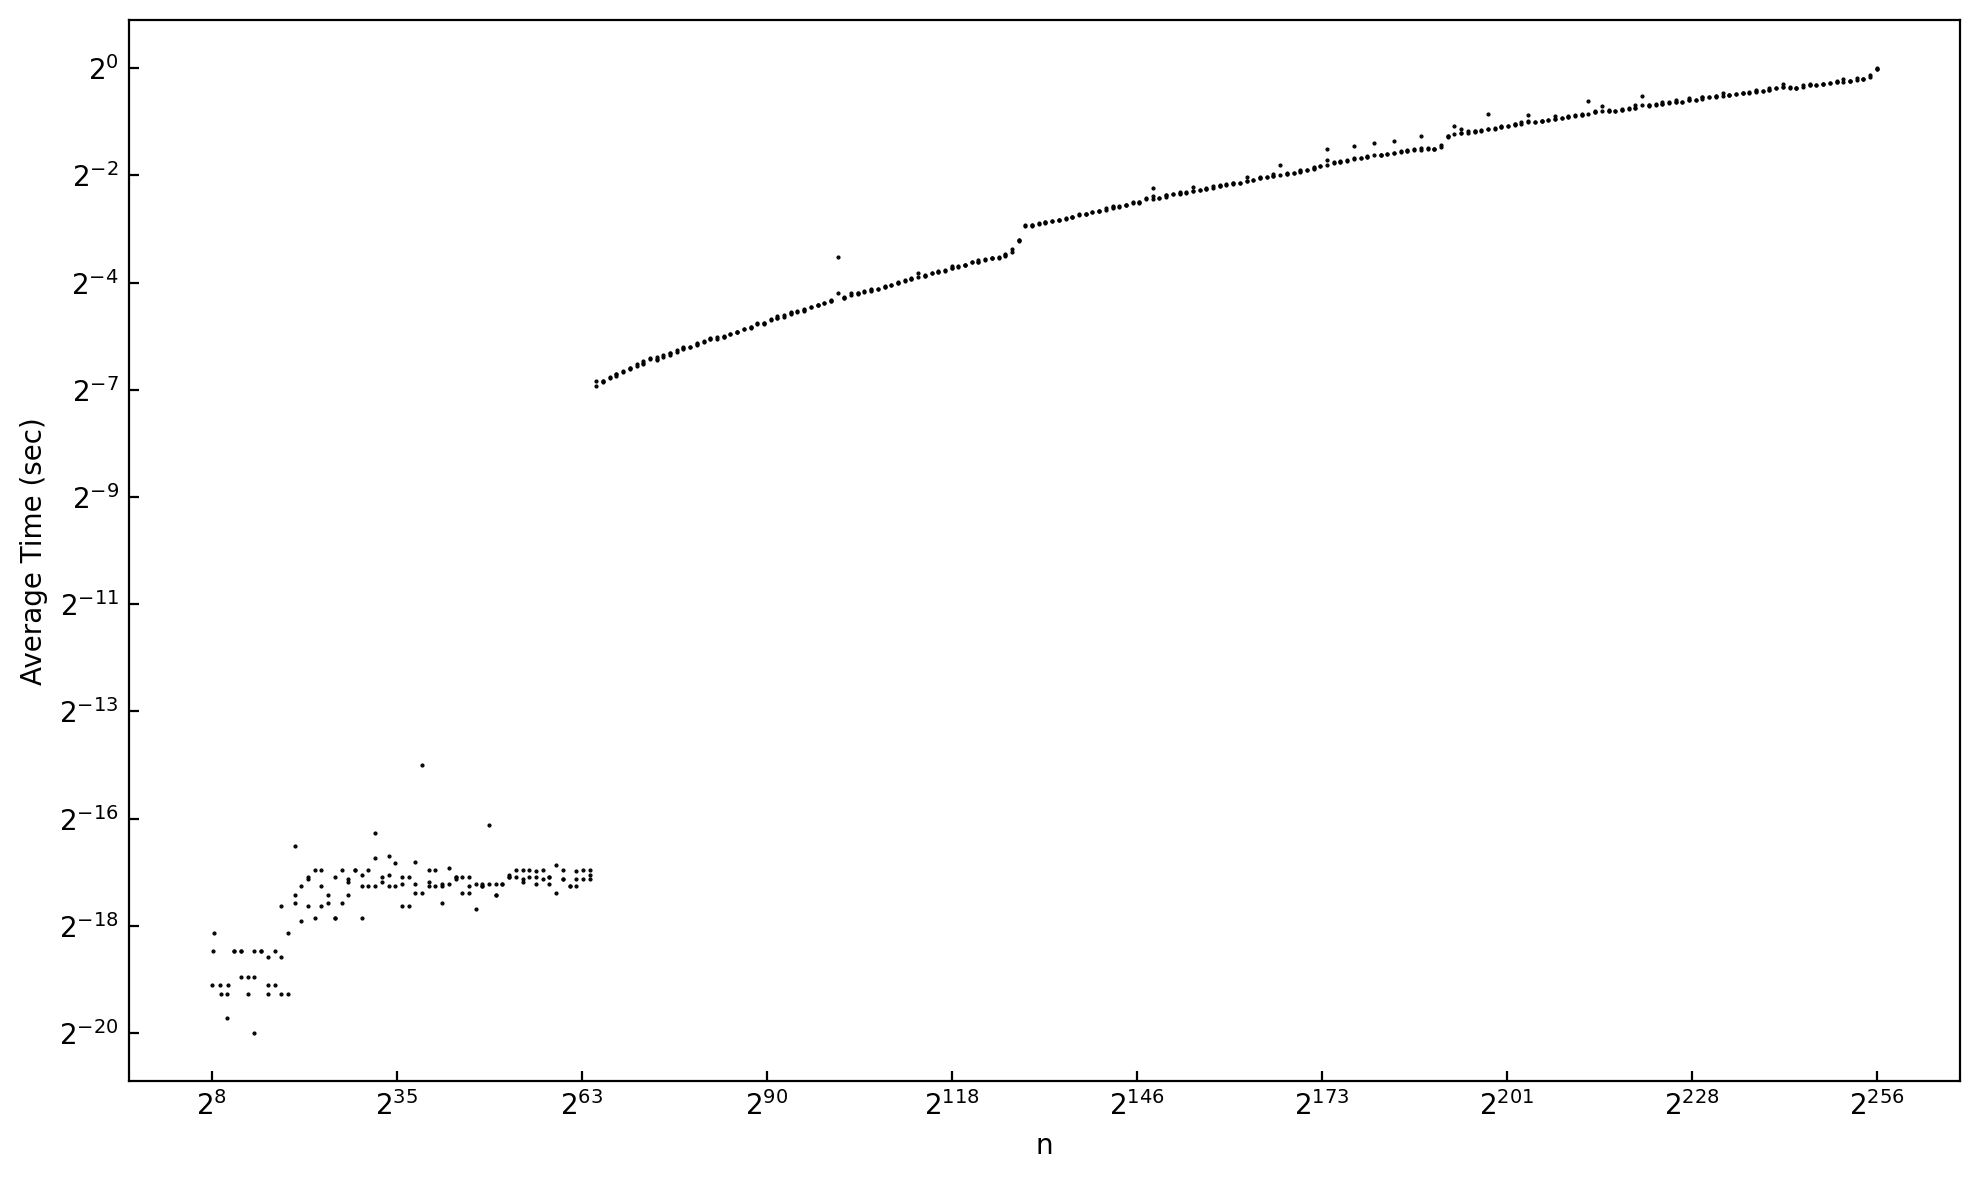

In [14]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_256[0]], times_256[1], dpts=623, log=True)

Finished concat.
Graphing...
227 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783 7.152557375267321e-07 3.7521910667419434


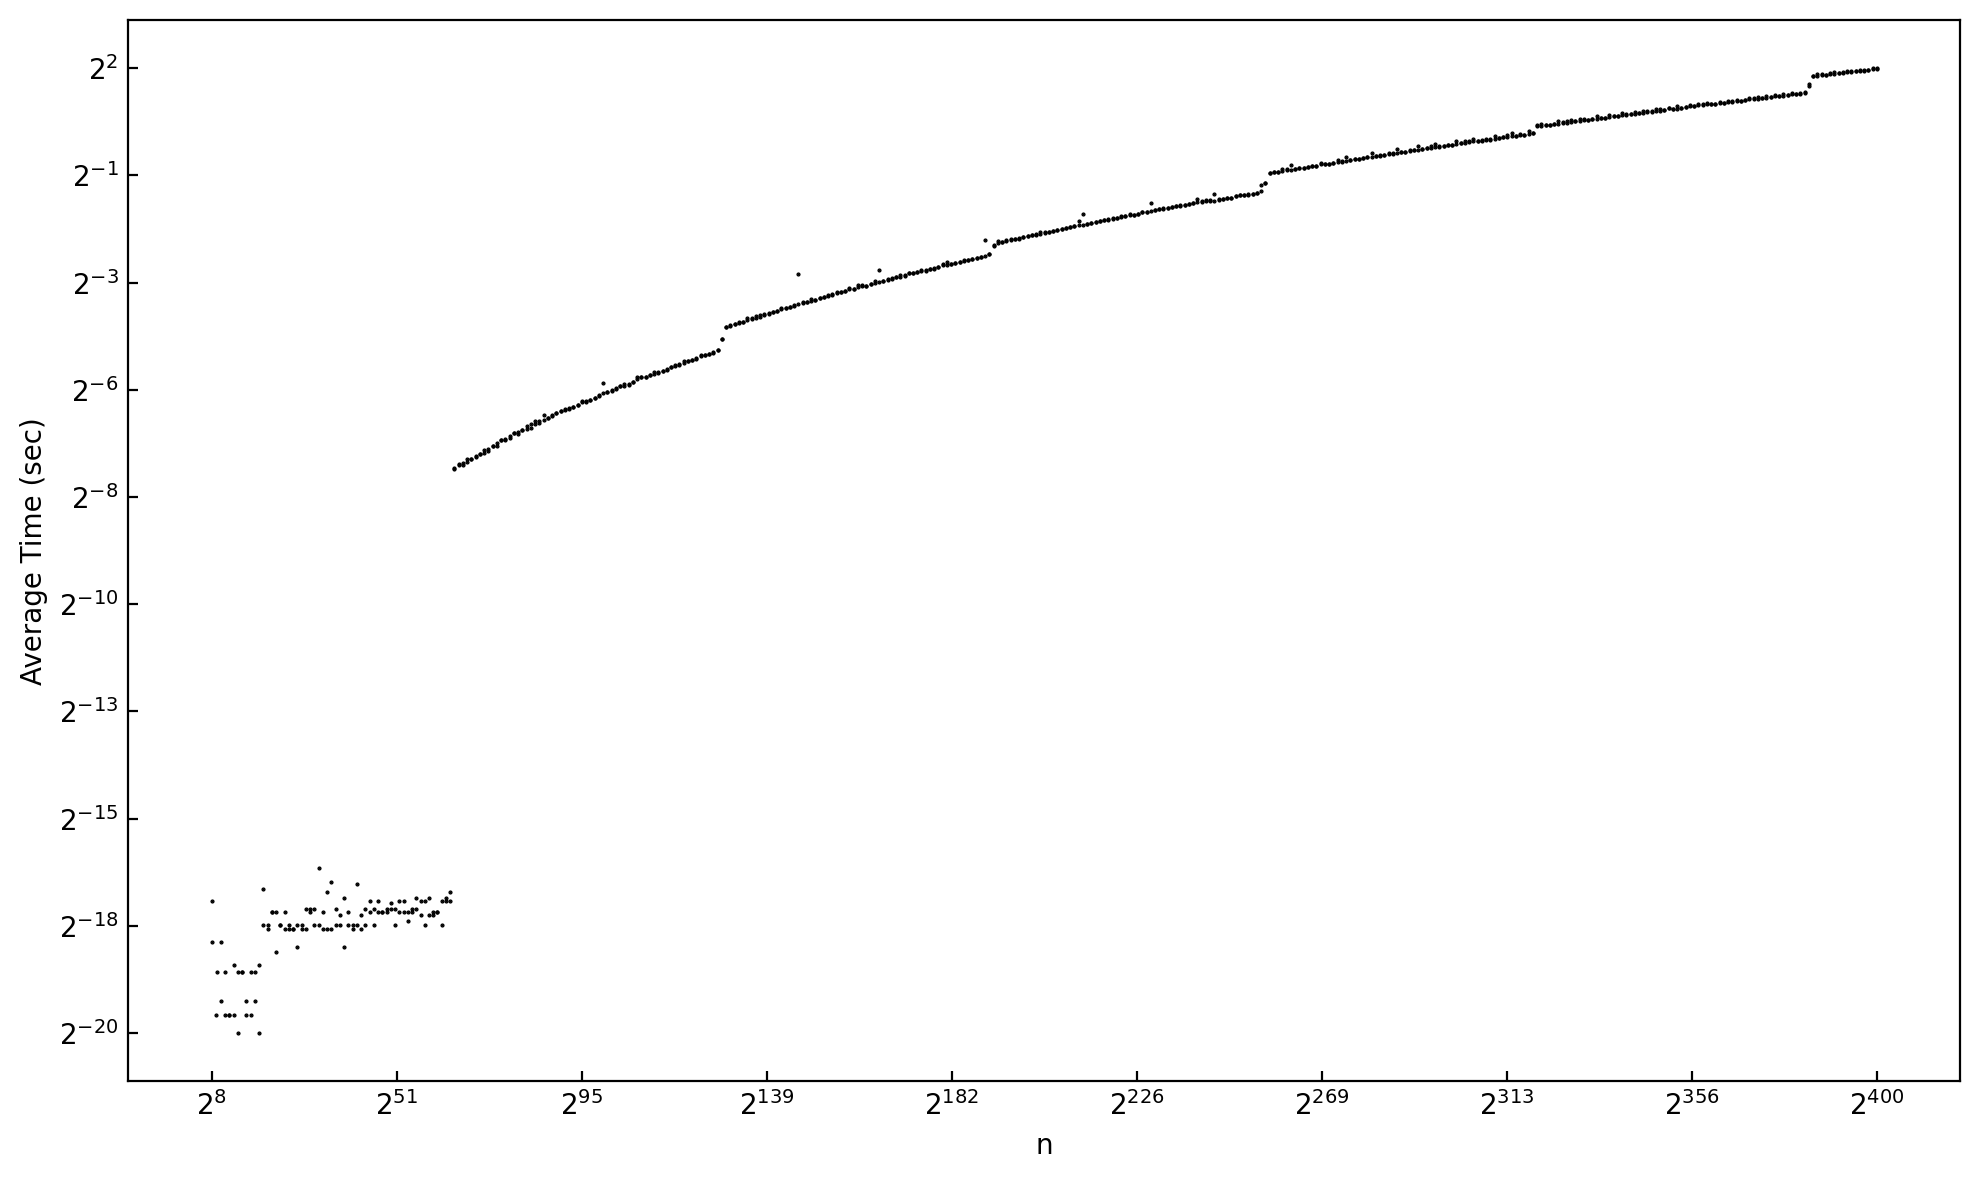

In [11]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_400[0]], times_400[1], dpts=786, log=True)

In [5]:
indexed_64_bit_primes = {}
for b in range(8,65):
    indexed_64_bit_primes[b] = [(2**b - k) for k in data[b]]
    print(len(indexed_64_bit_primes[b]), end=', ')

10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

In [65]:
tripleprimes = []
for b in range(8,29):
    count = 0
    for i1, p1 in enumerate(indexed_64_bit_primes[b]):
        if count >= 100:
            break
        for i2, p2 in enumerate(indexed_64_bit_primes[b][i1:]):
            if count >= 100:
                break
            for i3, p3 in enumerate(indexed_64_bit_primes[b][i2:]):
                if count >= 100:
                    break
                tripleprimes.append(p1*p2*p3)
                count += 1

print(len(tripleprimes), max(tripleprimes))
print(max(tripleprimes).bit_length())
print(tripleprimes[890:])

2100 19342800791988102749826199
84
[280638175375871, 280595295155941, 280535262848039, 280518110760067, 280492382628109, 280595295155941, 280552421487911, 280492398352669, 280475248885457, 280449524684639, 2251748274470911, 2251610837614583, 2251542119186419, 2251232886259681, 2250923653332943, 2250717498048451, 2250683138834369, 2250305187479467, 2250202109837221, 2250064672980893, 2251473409146799, 2251404694912907, 2251095480860393, 2250786266807879, 2250580124106203, 2250545766989257, 2250167838702851, 2250064767352013, 2249927338884229, 2251335982776151, 2251026778160749, 2250717573545347, 2250511437135079, 2250477081066701, 2250099164314543, 2249996096109409, 2249858671835897, 2250717616012351, 2250408453863953, 2250202345765021, 2250167994415199, 2249790129567157, 2249687075517691, 2249549670118403, 2250099334182559, 2249893254394963, 2249858907763697, 2249481094819771, 2249378054925973, 2249240668400909, 2249687193481591, 2249652849996029, 2249275071654847, 2249172041198161, 22

In [47]:
with open("temp_data.txt") as f:
    loaded = [(line.strip()) for line in f]

loaded = [int(c) for c in loaded]

In [66]:
times_sqf = primality_complexity(lambda n : factorize(n), 0, sorted(tripleprimes))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
9840287.666666666 1.9342799110644955e+25 6.8346659344668366e-06 2.3420914014180503


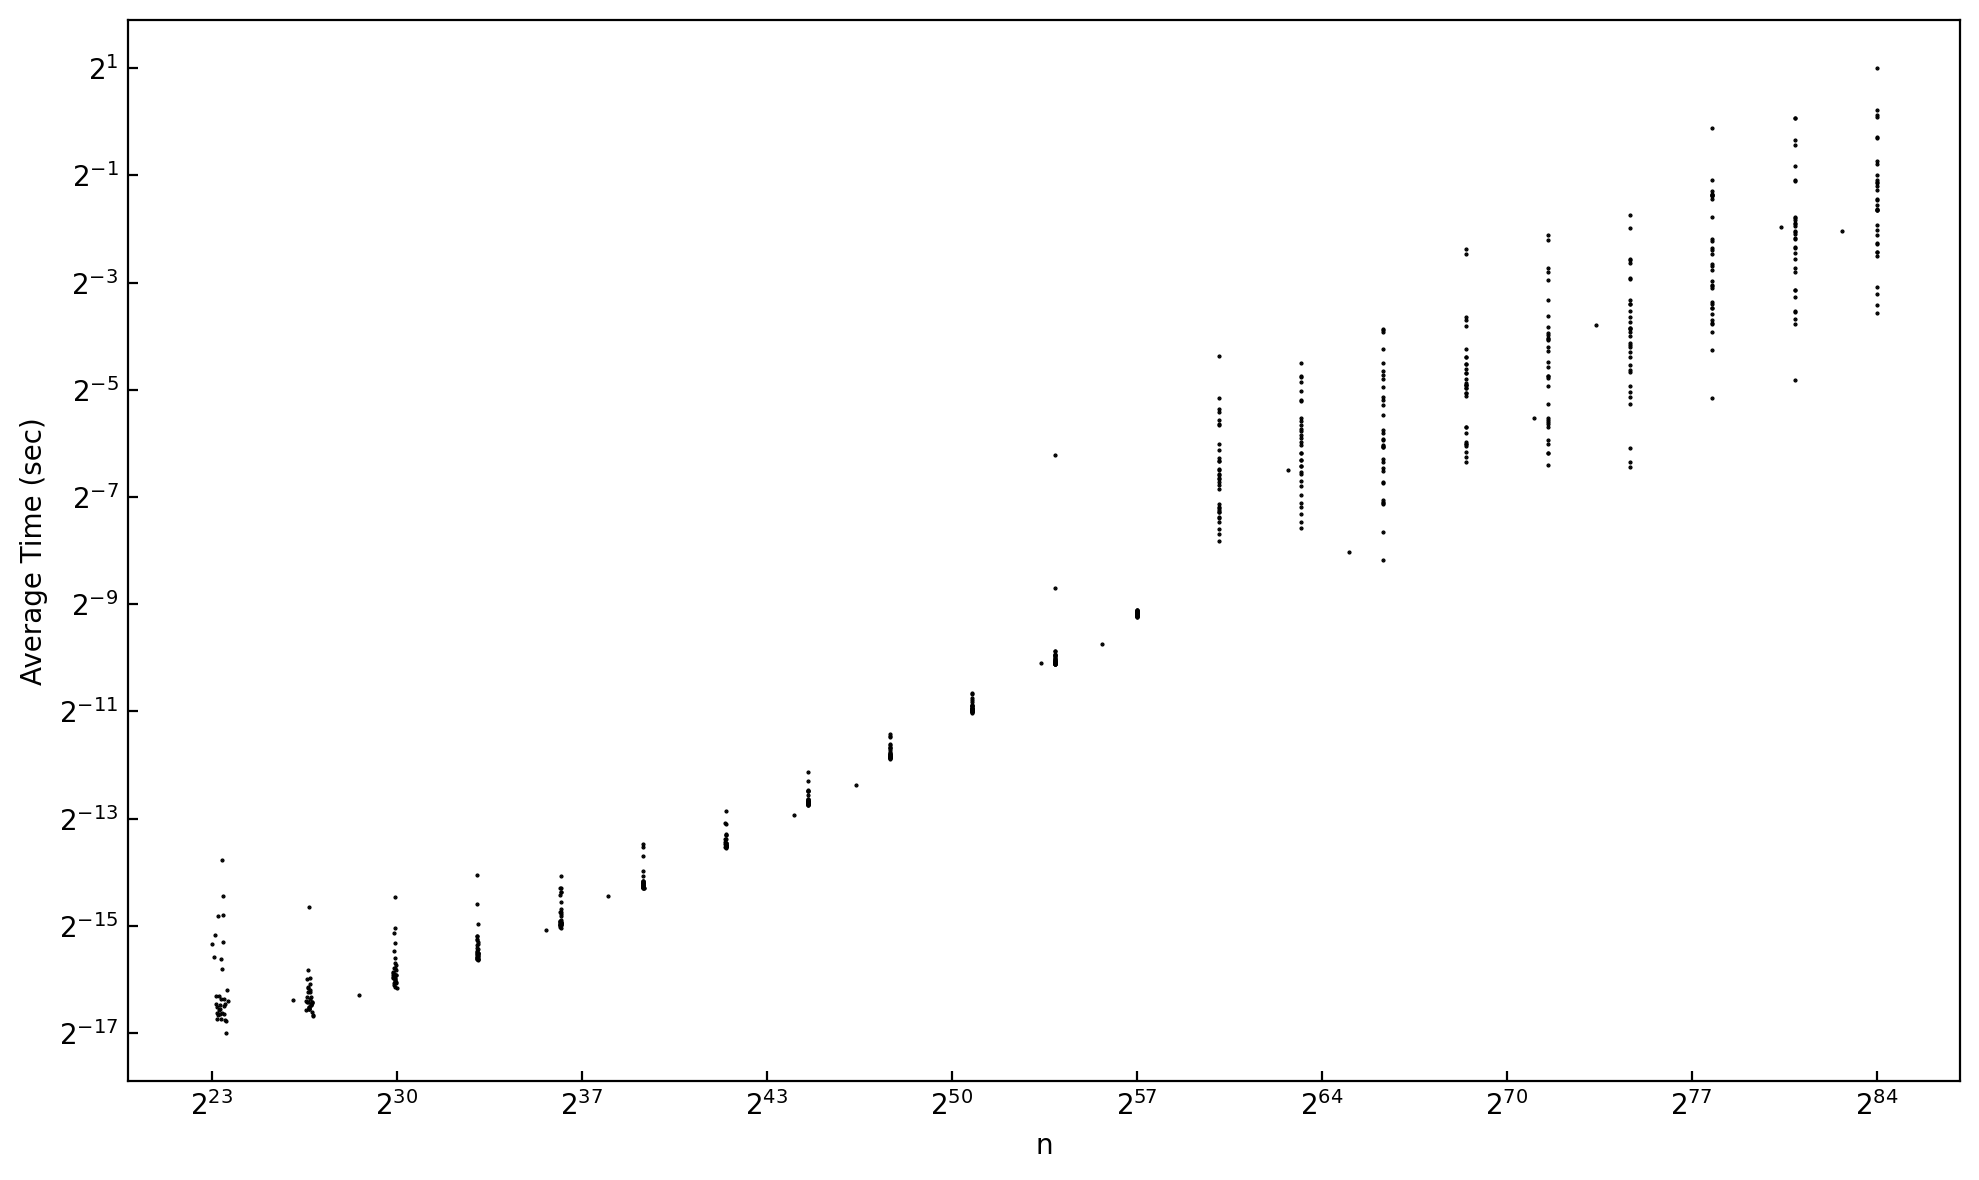

In [68]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_sqf[0]], times_sqf[1], dpts=700, log=True)

In [10]:
sieve_data = [int(10 ** (0.2*n)) for n in range(5, 51)]

len(sieve_data), sieve_data

(46,
 [10,
  15,
  25,
  39,
  63,
  100,
  158,
  251,
  398,
  630,
  1000,
  1584,
  2511,
  3981,
  6309,
  10000,
  15848,
  25118,
  39810,
  63095,
  100000,
  158489,
  251188,
  398107,
  630957,
  1000000,
  1584893,
  2511886,
  3981071,
  6309573,
  10000000,
  15848931,
  25118864,
  39810717,
  63095734,
  100000000,
  158489319,
  251188643,
  398107170,
  630957344,
  1000000000,
  1584893192,
  2511886431,
  3981071705,
  6309573444,
  10000000000])

In [11]:
times_sieve = primality_complexity(lambda n : sieve_to(n), 0, sorted(sieve_data))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
Finished collecting times.


Finished concat.
Graphing...
10 10000000000 1.2159347534401732e-05 245.64967107772827


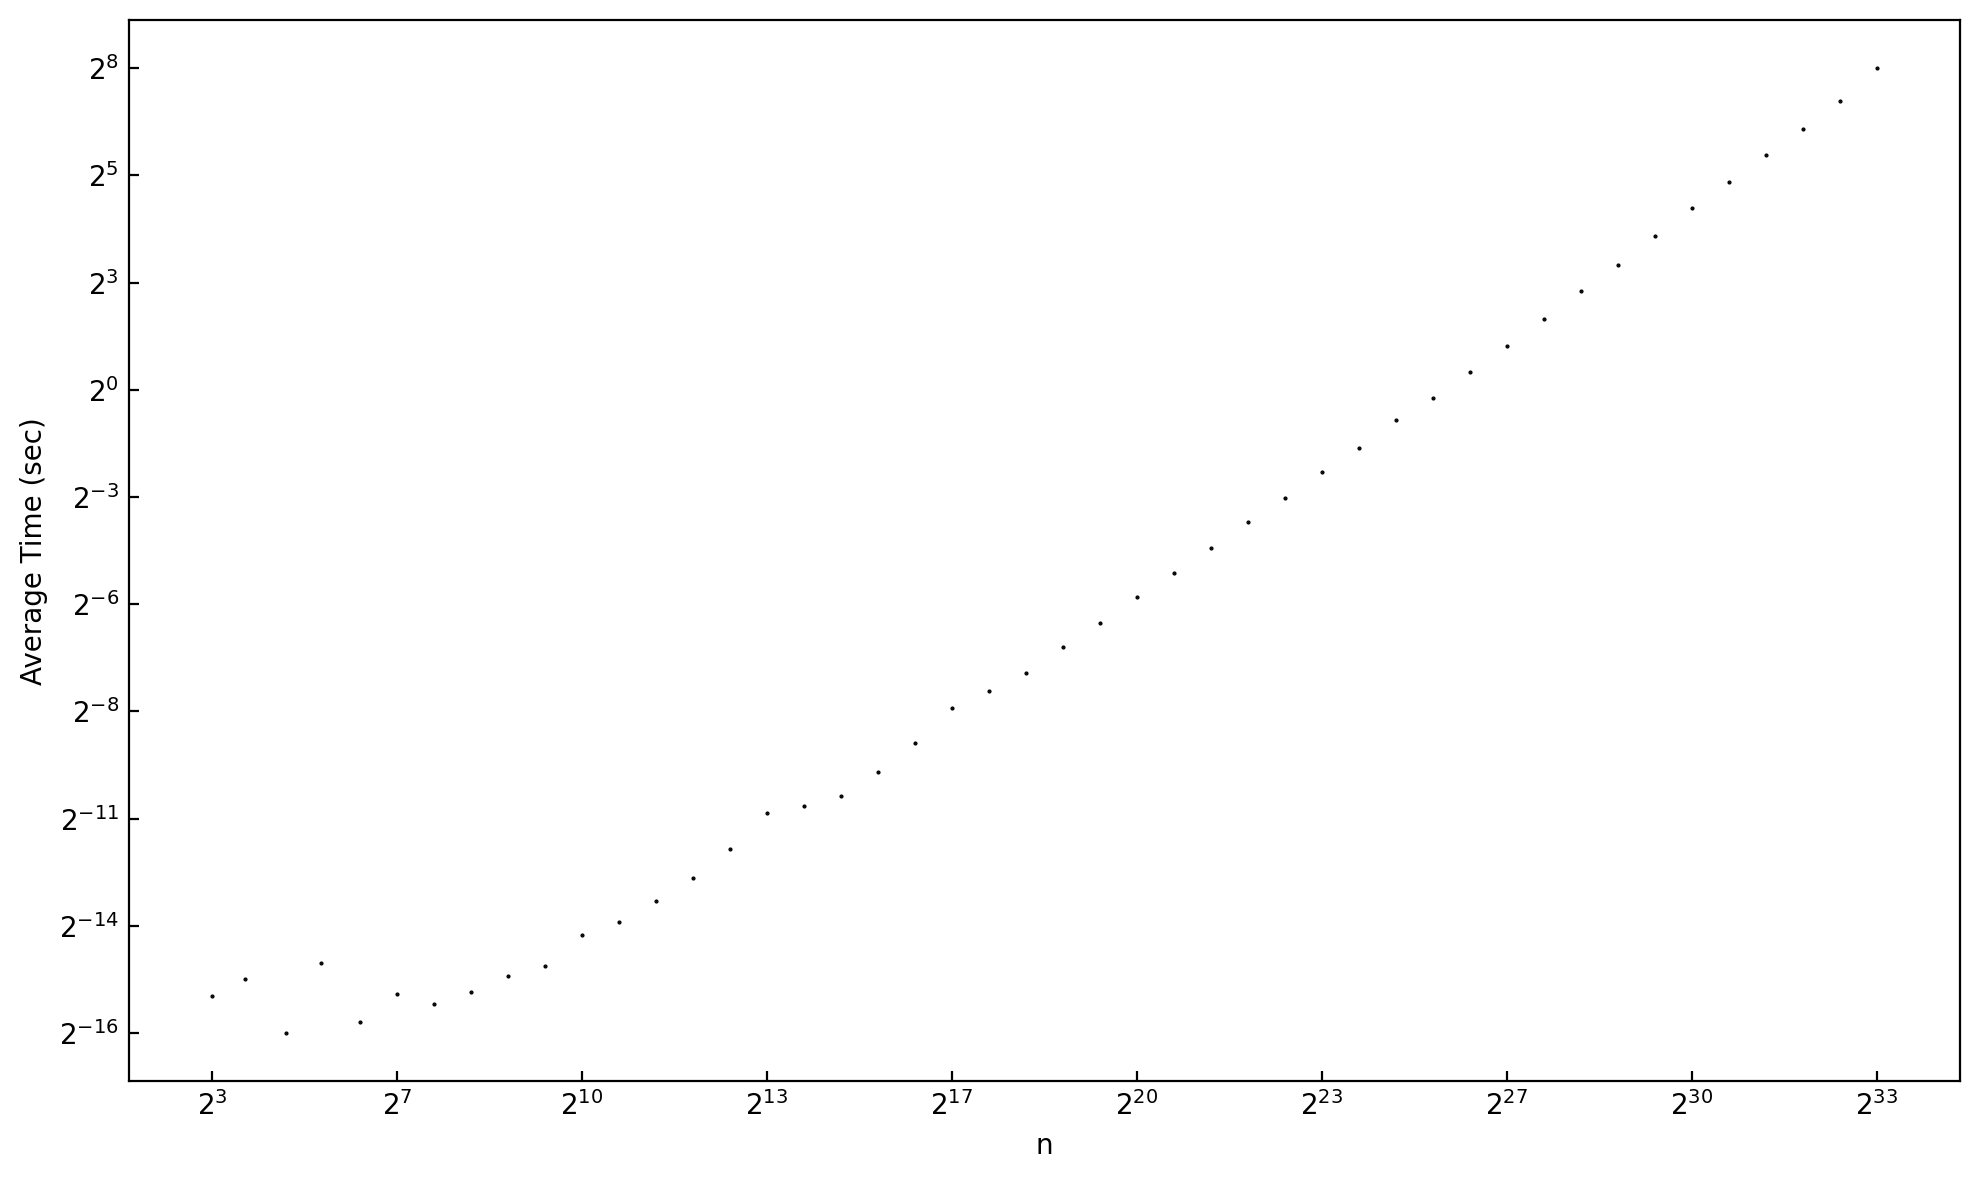

In [12]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_sieve[0]], times_sieve[1], dpts=46, log=True)

In [12]:
data_e = [e for e in range(8, 24)]

data_smooth = []
for e in data_e:
    primes_e = indexed_64_bit_primes[e] + indexed_64_bit_primes[e+1]
    y = 2**e - 1
    for _ in range(60):
        p1 = random.choice(primes_e)
        p2 = random.choice(primes_e)
        data_smooth.append((p1 * p2, y))

len(data_smooth), min(data_smooth), max(data_smooth), data_smooth

(960,
 (41989, 255),
 (281473634533607, 8388607),
 [(116213, 255),
  (106481, 255),
  (110179, 255),
  (52961, 255),
  (41989, 255),
  (110549, 255),
  (47959, 255),
  (221777, 255),
  (47053, 255),
  (55687, 255),
  (106481, 255),
  (49447, 255),
  (110657, 255),
  (96727, 255),
  (118331, 255),
  (97271, 255),
  (120229, 255),
  (97693, 255),
  (97693, 255),
  (213443, 255),
  (108601, 255),
  (115187, 255),
  (55189, 255),
  (119261, 255),
  (111101, 255),
  (253009, 255),
  (57599, 255),
  (54707, 255),
  (106817, 255),
  (104141, 255),
  (97709, 255),
  (245009, 255),
  (49163, 255),
  (224387, 255),
  (105569, 255),
  (115711, 255),
  (210677, 255),
  (51529, 255),
  (223693, 255),
  (114707, 255),
  (56153, 255),
  (233033, 255),
  (116213, 255),
  (116267, 255),
  (97709, 255),
  (45571, 255),
  (113471, 255),
  (247883, 255),
  (96727, 255),
  (116561, 255),
  (96913, 255),
  (104653, 255),
  (239021, 255),
  (233033, 255),
  (96727, 255),
  (55973, 255),
  (229441, 255),
  (2

In [13]:
times_smooth = primality_complexity(lambda n : is_smooth(*n), 0, sorted(data_smooth))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [16]:
inputs = [pair[1] for pair in times_smooth[1]]
inputs

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 511,
 255,
 255,
 511,
 511,
 255,
 511,
 255,
 511,
 255,
 511,
 511,
 255,
 511,
 255,
 255,
 255,
 511,
 255,
 255,
 511,
 255,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 1023,
 1023,
 511,
 511,
 1023,
 1023,
 511,
 1023,
 511,
 511,
 1023,
 1023,
 1023,
 1023,
 511,
 511,
 1023,
 1023,
 1023,
 1023,
 511,
 1023,
 511,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,


Finished concat.
Graphing...
255 8388607 1.7285346987083727e-06 0.001272737979889138


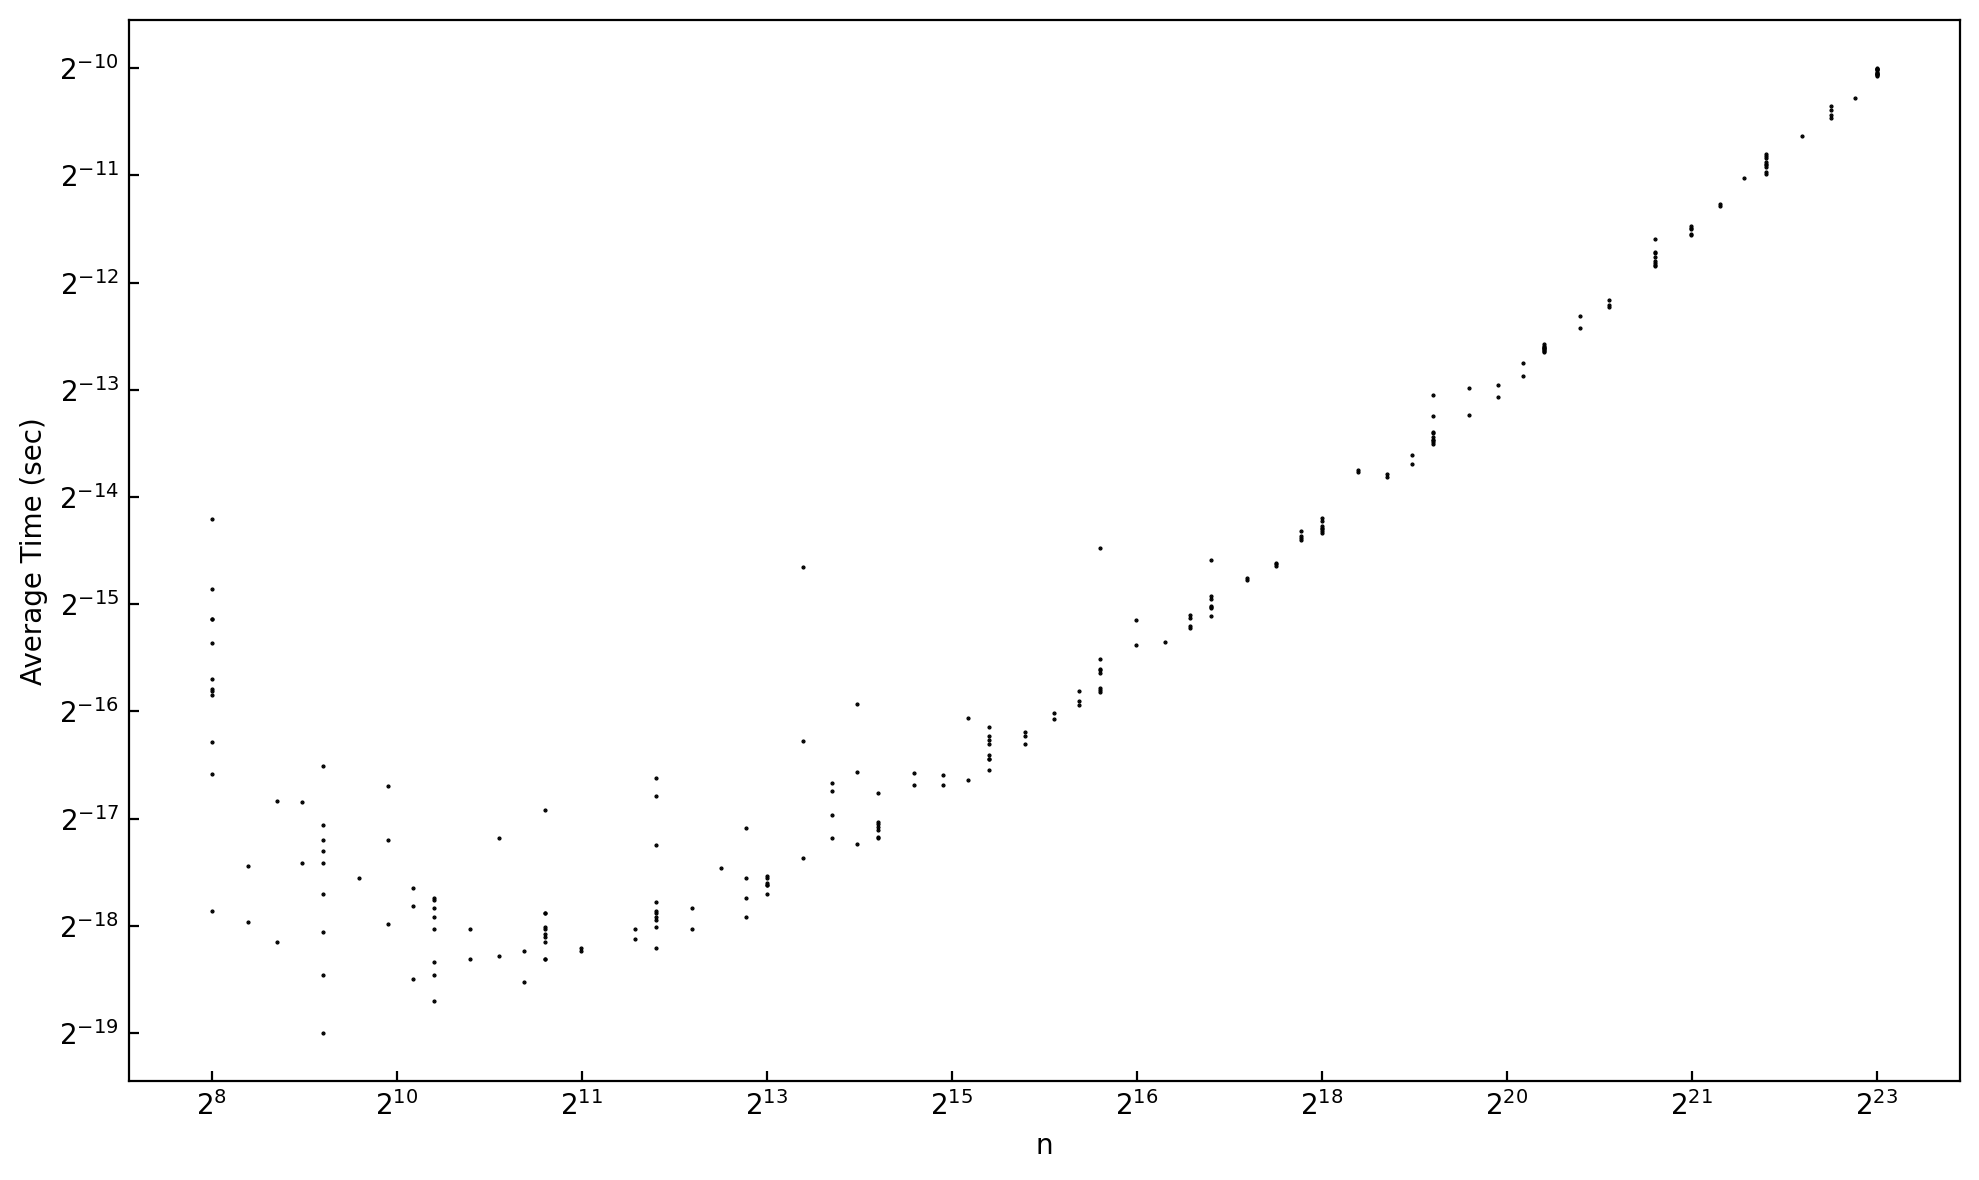

In [17]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_smooth[0]], inputs, dpts=240, log=True)